In [1]:
#Importamos la librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataser y mostramos las 5 primeras filas
data = pd.read_csv("wine.data")
data.head()

,tipo,alcohol,acido_malico,ceniza,alcalinidad_ceniza,magnesio,fenoles_totales,flavonoides,fenoles_no_flavoniodes,proantocianinas,intensidad_color,tono,od280,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.describe()

,tipo,alcohol,acido_malico,ceniza,alcalinidad_ceniza,magnesio,fenoles_totales,flavonoides,fenoles_no_flavoniodes,proantocianinas,intensidad_color,tono,od280,prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
predictors_col = ["alcohol","acido_malico","ceniza","alcalinidad_ceniza","magnesio","fenoles_totales","fenoles_totales","fenoles_no_flavoniodes","proantocianinas","intensidad_color","tono","od280","prolina"]
target_col = ['tipo']

In [6]:
predictors = data[predictors_col]
target = data[target_col]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state=13)

In [8]:
tree = DecisionTreeClassifier()

In [9]:
arbol = tree.fit(X_train, y_train)

[Text(0.5869565217391305, 0.9285714285714286, 'x[12] <= 755.0\ngini = 0.659\nsamples = 142\nvalue = [47, 56, 39]'),
 Text(0.34782608695652173, 0.7857142857142857, 'x[11] <= 2.115\ngini = 0.501\nsamples = 88\nvalue = [2, 52, 34]'),
 Text(0.17391304347826086, 0.6428571428571429, 'x[10] <= 0.935\ngini = 0.234\nsamples = 37\nvalue = [0, 5, 32]'),
 Text(0.08695652173913043, 0.5, 'x[8] <= 1.59\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.043478260869565216, 0.35714285714285715, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(0.13043478260869565, 0.35714285714285715, 'x[5] <= 1.725\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.08695652173913043, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.17391304347826086, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.2608695652173913, 0.5, 'x[1] <= 2.395\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.21739130434782608, 0.35714285714285715, 'gini = 0.0\nsam

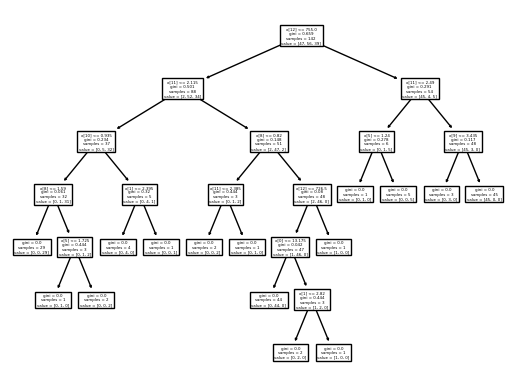

In [10]:
plot_tree(arbol)

In [11]:
predicciones = arbol.predict(X_test)

In [12]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,12,0,0
2,1,14,0
3,0,0,9


In [13]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.9722222222222222